# Appendix 1. Ellipsoidal variation
## 1.1 Overview: the effect of ellipsoidal variation on the eclipse depth

Ellipsoidal variation changes the baseline curvature during the eclipse making an eclipse appear deeper than it actually is if ellipsoidal variation is not taken into account.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pytransit import EclipseModel

In [4]:
a = 3.639
p = 1.22
tec = 0.5*p

In [5]:
em = EclipseModel()
time = linspace(tec-0.25, tec+0.25, 1500)
em.set_data(time)

In [6]:
fec = em.evaluate(0.1, 0.0, p, a, 0.5*pi) - 1
aev = 0.05
fev = - aev*cos(2 * time * (2*pi) / p)

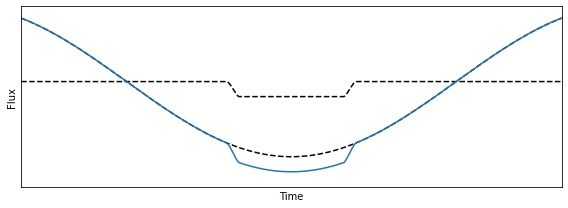

In [7]:
fig, ax = subplots(figsize=(8,3))
ax.plot(time-tec, 1 + fec, 'k--')
ax.plot(time-tec, 1 + fev, 'k--')
ax.plot(time-tec, 1 + fec+fev)
setp(ax, xlim=(-0.25, 0.25), ylim=(0.93, 1.05), xlabel='Time', ylabel='Flux', xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('ev_issue_1.png', dpi=300)

The apparent eclipse depth $\Delta F_\mathrm{App}$ is significantly deeper than the true eclipse depth $\Delta F_\mathrm{True}$.

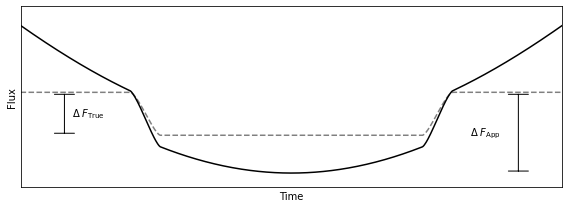

In [8]:
fig, ax = subplots(figsize=(8,3))
ax.plot(time-tec, 1 + fec, '--', c='0.5')
ftot = 1.0412 + fec+fev
fmin = ftot.min()
ax.plot(time-tec, ftot, 'k')
ax.annotate('', (-0.084, 0.99), xytext=(-0.084,1.0), arrowprops=dict(arrowstyle='|-|'))
ax.text(-0.069, 0.995, '$\Delta\; F_\mathrm{True}$', va='center', ha='right')
ax.annotate('', (0.084, 1.0), xytext=(0.084, ftot.min()), arrowprops=dict(arrowstyle='|-|'))
ax.text(0.066, 0.5*(1.0+fmin), '$\Delta\; F_\mathrm{App}$', va='center', ha='left')
setp(ax, xlim=(-0.1, 0.1), ylim=(0.978, 1.02), xlabel='Time', ylabel='Flux', xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('ev_issue_2.png', dpi=300)

## 1.2 Moving from TESS to CHEOPS

The TESS photometry provides a good estimate for the ellipsoidal variation amplitude in the TESS passband. The EV amplitude is a product of planet-star mass ratio, semi-major axis, orbital eccentricity and inclination, and gravity and limb darkening.

$$
A_\mathrm{ev} = \beta \frac{M}{a_\mathrm{s}^3 M_\star} \frac{1 + e\cos \nu}{1 - e^2} \sin(i)^3 \approx \beta \frac{l}{a_\mathrm{s}^3} \sin(i)^3
$$

$$
\beta = 0.12 \frac{(15 + u)(1 + g)}{3 - u}
$$

Where $u$ is the linear limb darkening coefficient and $g$ the gravity darkening coefficient.

Only the gravity darkening and limb darkening are passband dependent, all the other parameters are the same for TESS and CHEOPS observations. Thus, we can calculate the EV amplitude in the CHEOPS passband from the TESS EV amplitude

H and K

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
from src.kelt1 import LDPSetCreator, filters, filter_names
from uncertainties import ufloat

In [4]:
log10(6516)

3.813981075636472

Gravity-darkening coefficients taken from [Claret2021](https://iopscience.iop.org/article/10.3847/2515-5172/abdcb3),  [Claret2017](https://ui.adsabs.harvard.edu/abs/2017A%26A...600A..30C/abstract), and [Claret2011](https://www.aanda.org/articles/aa/full_html/2011/05/aa16451-11/aa16451-11.html).

In [5]:
gcheops = 1.1634 / 4
gtess = 0.215
gh = 0.089
gk = 0.083
g36 = 0.077
g45 = 0.084

In [7]:
sc = LDPSetCreator((6516., 49.), (4.228,0.02), (0.052, 0.079), filters=filters, dataset='visir-lowres')
ps = sc.create_profiles()
ps.set_uncertainty_multiplier(10)

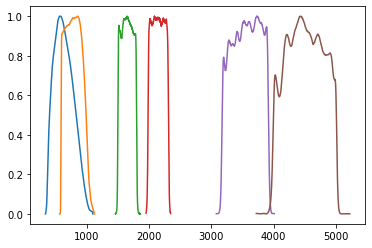

In [8]:
for f in filters:
    plot(f.wavelength, f.transmission)

In [15]:
ldc, lde = ps.coeffs_ln()

In [33]:
def beta(u, g):
    return 0.13*((15+u)*(1+g))/(3-u)

In [34]:
for f, u, ue,g in zip(filter_names, ldc, lde,[gcheops, gtess, gh, gk, g36, g45]):
    print(f"{f:6s} {beta(ufloat(u, ue), g) / beta(ufloat(ldc[1], lde[1]), gtess)}")

CHEOPS 1.1284+/-0.0023
TESS   1.0000+/-0.0020
H      0.8103+/-0.0013
Ks     0.7981+/-0.0012
S1     0.7777+/-0.0012
S2     0.7753+/-0.0012


---

<center>&copy; 2021 Hannu Parviainen</center>